In [1]:
import numpy as np
import torch
import os
import pandas as pd

In [2]:
# Chemin du répertoire contenant les fichiers .pt
embeddings_dir = "curated_dataset/individual_embeddings_original"

# Initialiser le dictionnaire pour stocker les embeddings
embeddings_dict = {}
count = 0

# Itérer sur les fichiers .pt dans le répertoire
for filename in os.listdir(embeddings_dir):
    count = count + 1
    # Obtenir l'ID de la séquence à partir du nom du fichier
    sequence_id = filename.split(".pt")[0]

    # Charger le tenseur d'embedding depuis le fichier .pt
    embedding = torch.load(os.path.join(embeddings_dir, filename))

    # Ajouter l'embedding au dictionnaire avec l'ID de la séquence comme clé
    embeddings_dict[sequence_id] = embedding
    if count == 2:
        print("sequence_id", sequence_id)

# Maintenant, tu as un dictionnaire avec les embeddings chargés et prêts à l'emploi
len(embeddings_dict)


sequence_id A0A5E4HS15.1


35854

In [4]:
print("defectuoso", len(embeddings_dict["Q54EQ8.1"]))

defectuoso 76


In [5]:
len("SLFGGQTQTTTSPFGSQTSTPFGQPQQTNTGSGLFGAQQTQQTNTGGGLFGAQPTQQTSGGGLFGTQPTSGTGLFG")

76

In [6]:
# Iterar sobre los primeros elementos del diccionario
for i, (key, value) in enumerate(embeddings_dict.items()):
    print(f"{key}: {value}")
    print("len", value.shape)
    if i >= 2:
        break



A0A0F6AC62.1: tensor([[ 0.2372, -0.1559,  0.1103,  ...,  0.3969, -0.5825, -0.0428],
        [-0.3194, -0.1705, -0.0451,  ...,  0.3626,  0.0815, -0.1895],
        [ 0.0437, -0.1727,  0.3814,  ...,  0.1214, -0.1519,  0.0835],
        ...,
        [-0.2321, -0.0523, -0.0148,  ...,  0.4848, -0.0748,  0.2708],
        [ 0.1027, -0.2259,  0.1735,  ..., -0.1111, -0.0759, -0.2376],
        [ 0.2237, -0.1295,  0.1406,  ..., -0.0047, -0.1700, -0.3562]],
       requires_grad=True)
len torch.Size([50, 320])
A0A5E4HS15.1: tensor([[ 0.0776,  0.5679,  0.3548,  ...,  1.2091,  0.3872, -0.2083],
        [ 0.0622, -0.4613,  0.2075,  ...,  0.0323, -0.0510,  0.2340],
        [-0.0388, -0.2371, -0.1866,  ..., -0.0708,  0.2436,  0.1552],
        ...,
        [ 0.0591,  0.0199, -0.1469,  ..., -0.0629,  0.0126, -0.2372],
        [ 0.2729,  0.2205, -0.2491,  ...,  0.0683,  0.0939, -0.4274],
        [-0.0058,  0.2432,  0.0837,  ..., -0.0527, -0.3397, -0.0704]],
       requires_grad=True)
len torch.Size([42, 320]

In [3]:
def get_conservation_scores(csv_file):
    # Charger le CSV
    df = pd.read_csv(csv_file, delimiter=',', names=[
                     'sequence id', 'conservation score'], header=0)
    sequences = df['sequence id'].values
    conservation_scores = df['conservation score'].apply(lambda x: np.array(
    [float(i) if i != 'nan' else 0.0 for i in x.split()], dtype=np.float32)).values
    #print("conservation_scores", conservation_scores)

    return sequences, conservation_scores

sequences, conservation_scores_array = get_conservation_scores('curated_dataset/filtered_conservation_scores_35854.csv')

In [5]:
conservation_scores_array[1]

array([0.329834, 0.481934, 0.342285, 0.564941, 0.238525, 0.47168 ,
       0.438721, 0.492676, 0.788574, 0.220581, 0.723633, 0.492188,
       0.746582, 0.791016, 0.192017, 0.133179, 0.223022, 0.570312,
       0.258057, 0.250488, 0.561523, 0.192627, 0.457764, 0.516113,
       0.197021, 0.366455, 0.281982, 0.490234, 0.554688, 0.349121,
       0.444824, 0.409424, 0.41748 , 0.578125, 0.206055, 0.260498,
       0.522949, 0.725098, 0.470947, 0.601074, 0.477539, 0.161255,
       0.461182, 0.463379, 0.349365, 0.472656, 0.257568, 0.697754,
       0.404053, 0.223633, 0.222412, 0.219482, 0.146606, 0.22229 ,
       0.18103 , 0.207642, 0.268555, 0.400879, 0.336914, 0.219727,
       0.213135, 0.355713, 0.301514, 0.17981 , 0.327148, 0.360596,
       0.368408, 0.166626, 0.146362, 0.070801, 0.104004, 0.057739,
       0.181152, 0.062988, 0.031799, 0.063232, 0.127197, 0.136108,
       0.109619, 0.282471, 0.36377 , 0.185791, 0.05777 , 0.430176,
       0.244141, 0.400391, 0.170166, 0.174072, 0.413574, 0.489

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A6V2YLE5.1/558-674',) y 117 y 60
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A259HE10.1/43-148',) y 106 y 208
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A6P7YWC7.1/4085-4167',) y 83 y 84
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('R4K6S0.1/243-358',) y 116 y 81
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A2E2XEI3.1/363-477',) y 115 y 114
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A0L0SP69.1/898-991',) y 94 y 267
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A4Q8C0E3.1/247-363',) y 117 y 140
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('I0R687.1/331-428',) y 98 y 44
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A0H3YJP0.1/580-733',) 

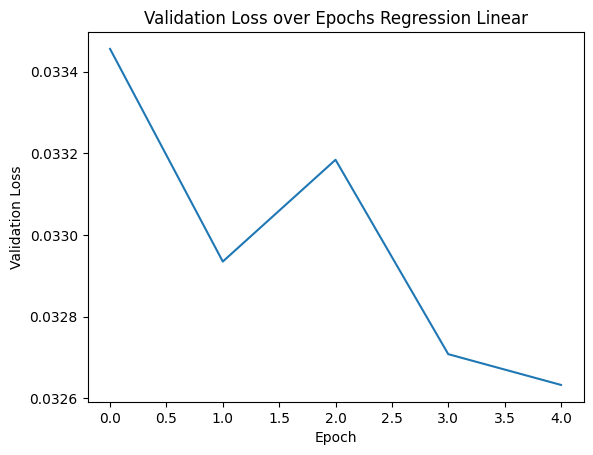

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('Q54EQ8.1/622-713',) y 92 y 76
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A7M7P1K2.1/230-388',) y 159 y 190
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('I6NEA7.1/22-332',) y 311 y 76
Test Loss: 0.033463410311560235


In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as plt

# Define your datasets (train, validation, test)
dataset = [(embeddings_dict[sequence.split("/")[0]], conservation_scores, sequence) for sequence, conservation_scores in zip(sequences, conservation_scores_array)]
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, val_size, test_size])

# Create data loaders for train, validation, and test
train_loader = data.DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Define your model
class LinearRegression(nn.Module):
    def __init__(self, input_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Define training function
def train_model(model, optimizer, loss_fn, data_loader):
    model.train()
    for embedding, label, sequence in data_loader:
        optimizer.zero_grad()
        embedding = embedding.squeeze()
        label = label.squeeze()
        if embedding.size(0) != label.size(0):
            print(f"Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: {sequence} y {label.size(0)} y {embedding.size(0)}" )
            continue
        output = model(embedding).squeeze()
        loss = loss_fn(output, label)
        #print("embedding", embedding)
        #print("embedding.shape", embedding.shape)
        #print("label", label)
        #print("labelshape", label.shape)
        
        #print("output", output)
        #print("output.shape", output.shape)
        loss.backward()
        optimizer.step()

# Define evaluation function
def evaluate_model(model, loss_fn, data_loader):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for embedding, label, sequence in data_loader:
            embedding = embedding.squeeze()
            label = label.squeeze()
            output = model(embedding).squeeze()
            if embedding.size(0) != label.size(0):
                print(f"Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: {sequence} y {label.size(0)} y {embedding.size(0)}" )
                continue
            #print("embedding.shape ev", embedding.shape)
            #print("label", label)
            #print("labelshape", label.shape)
            
            #print("output", output)
            #print("output.shape", output.shape)
            loss = loss_fn(output, label)
            running_loss += loss.item()
    return running_loss / len(data_loader)

# Initialize the model, loss function, and optimizer
model = LinearRegression(input_size=320)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5
val_losses = []
for epoch in range(num_epochs):
    train_model(model, optimizer, loss_fn, train_loader)
    val_loss = evaluate_model(model, loss_fn, val_loader)
    val_losses.append(val_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss}')

# Plot validation loss over epochs
plt.plot(val_losses)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs Regression Linear')
plt.show()

# Finally, evaluate on test set
test_loss = evaluate_model(model, loss_fn, test_loader)
print(f'Test Loss: {test_loss}')

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('V3Z1U4.1/125-374',) y 250 y 44
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A6P7YWC7.1/4085-4167',) y 83 y 84
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A6P8HMM9.1/556-662',) y 107 y 108
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A1Y1Y8X0.1/333-680',) y 348 y 117
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A553PFE8.1/1433-1850',) y 418 y 69
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('I6NEA7.1/22-332',) y 311 y 76
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('R4K6S0.1/243-358',) y 116 y 81
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A7M7P1K2.1/230-388',) y 159 y 190
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A0H3YJP0.1/580-733',) y

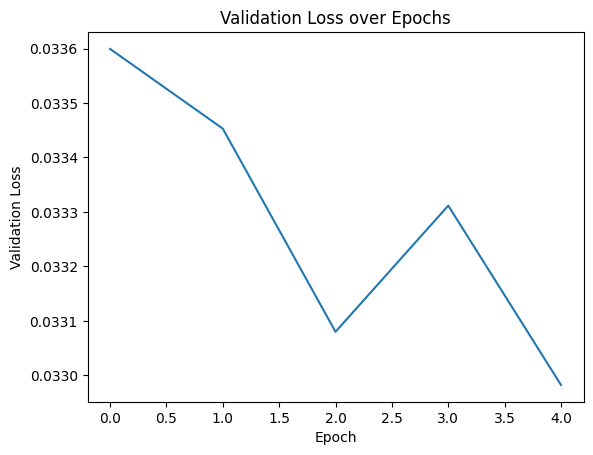

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A0L0SP69.1/898-991',) y 94 y 267
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A4Q8C0E3.1/247-363',) y 117 y 140
Test Loss: 0.033025779902577865


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as plt

# datasets (train, validation, test)
dataset = [(embeddings_dict[sequence.split("/")[0]], conservation_scores, sequence) for sequence, conservation_scores in zip(sequences, conservation_scores_array)]
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, val_size, test_size])

# Creation data loaders for train, validation, and test
train_loader = data.DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Definition model
class LinearRegression(nn.Module):
    def __init__(self, input_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# the training function
def train_model(model, optimizer, loss_fn, data_loader):
    model.train()
    for embedding, label, sequence in data_loader:
        optimizer.zero_grad()
        embedding = embedding.squeeze()
        label = label.squeeze()
        if embedding.size(0) != label.size(0):
            print(f"Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: {sequence} y {label.size(0)} y {embedding.size(0)}" )
            continue
        output = model(embedding).squeeze()
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()

# Define evaluation function
def evaluate_model(model, loss_fn, data_loader):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for embedding, label, sequence in data_loader:
            embedding = embedding.squeeze()
            label = label.squeeze()
            output = model(embedding).squeeze()
            if embedding.size(0) != label.size(0):
                print(f"Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: {sequence} y {label.size(0)} y {embedding.size(0)}" )
                continue
            loss = loss_fn(output, label)
            running_loss += loss.item()
    return running_loss / len(data_loader)

# On initialize the model, loss function, and optimizer with L2 regularization
model = LinearRegression(input_size=320)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight_decay for L2 regularization

# Train the model
num_epochs = 5
val_losses = []
for epoch in range(num_epochs):
    train_model(model, optimizer, loss_fn, train_loader)
    val_loss = evaluate_model(model, loss_fn, val_loader)
    val_losses.append(val_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss}')

# Plot validation loss over epochs
plt.plot(val_losses)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.show()

# Finally, on evalue on test set
test_loss = evaluate_model(model, loss_fn, test_loader)
print(f'Test Loss: {test_loss}')


este es el codigo anterior con solo 1000 secuencias

In [6]:
import torch

# Fonction pour calculer le coefficient de corrélation de Pearson
def pearson_correlation(true_scores, predicted_scores):
    # Calculer les moyennes des scores réels et prédits
    mean_true = torch.mean(true_scores)
    mean_pred = torch.mean(predicted_scores)

    # Calculer les différences par rapport à la moyenne
    diff_true = true_scores - mean_true
    diff_pred = predicted_scores - mean_pred

    # Calculer la covariance
    cov = torch.sum(diff_true * diff_pred) / len(true_scores)

    # Calculer les écarts-types
    std_true = torch.sqrt(torch.sum(diff_true ** 2) / len(true_scores))
    std_pred = torch.sqrt(torch.sum(diff_pred ** 2) / len(predicted_scores))

    # Calculer le coefficient de corrélation de Pearson
    pearson_corr = cov / (std_true * std_pred)

    return pearson_corr

In [26]:
import torch


# Faire des prédictions sur l'ensemble de données de test et obtenir les scores réels
model.eval()
true_scores = []
predicted_scores = []
count = 0
with torch.no_grad():
    for embedding, label, sequence in test_loader:
        count = count + 1
        embedding = embedding.squeeze()
        label = label.squeeze()
        output = model(embedding).squeeze()
        if embedding.size(0) != label.size(0):
            print(f"Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: {sequence} y {label.size(0)} y {embedding.size(0)}" )
            continue
        if count == 2:
            print("label", label)
            print("output", output)
        true_scores.append(label)
        predicted_scores.append(output)

# Convertir les listes en tenseurs PyTorch
true_scores_tensor = torch.cat(true_scores)
predicted_scores_tensor = torch.cat(predicted_scores)

# Calculer le coefficient de corrélation de Pearson
pearson_corr = pearson_correlation(true_scores_tensor, predicted_scores_tensor)
print(f"Coefficient de corrélation de Pearson: {pearson_corr}")


label tensor([0.4919, 0.2313, 0.3818, 0.1685, 0.2695, 0.1858, 0.1532, 0.3962, 0.2444,
        0.3074, 0.4836, 0.1338, 0.2737, 0.1707, 0.1571, 0.1104, 0.3152, 0.4802,
        0.6621, 0.3076, 0.4839, 0.1354, 0.3293, 0.2324, 0.5620, 0.4451, 0.3264,
        0.2832, 0.2832, 0.2651, 0.3567, 0.1647, 0.4163, 0.1479, 0.5259, 0.1555,
        0.8252, 0.1001, 0.3469, 0.3096, 0.2908, 0.3000, 0.2380, 0.2910, 0.4534,
        0.1236, 0.3079, 0.1798, 0.2715, 0.2357, 0.3049, 0.5562, 0.1978, 0.5918,
        0.4438, 0.1338, 0.3433, 0.6260, 0.1481, 0.3833, 0.2917, 0.5898, 0.1414,
        0.1331, 0.1196, 0.1395, 0.0895, 0.1908, 0.0676, 0.2715, 0.1299, 0.2428,
        0.2170, 0.2045, 0.1802, 0.2048, 0.3608, 0.2034, 0.2668, 0.3818, 0.3162,
        0.2413, 0.1004, 0.2300, 0.0997, 0.0000, 0.2040, 0.2426, 0.4724, 0.3118,
        0.5571, 0.3569, 0.4958, 0.3198, 0.3701, 0.2830, 0.2871, 0.1715, 0.4336,
        0.2192, 0.4048, 0.2581, 0.4888, 0.3167, 0.4009, 0.7368, 0.2781, 0.2632,
        0.1716, 0.2920, 0.2834, 0.

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A259HE10.1/43-148',) y 106 y 208
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A553PFE8.1/1433-1850',) y 418 y 69
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('K2IS43.1/381-491',) y 111 y 198
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('R4K6S0.1/243-358',) y 116 y 81
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A0L0SP69.1/898-991',) y 94 y 267
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A7M7P1K2.1/230-388',) y 159 y 190
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A6V2YLE5.1/558-674',) y 117 y 60
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A6P7YWC7.1/4085-4167',) y 83 y 84
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('Q54EQ8.1/622-713',) y

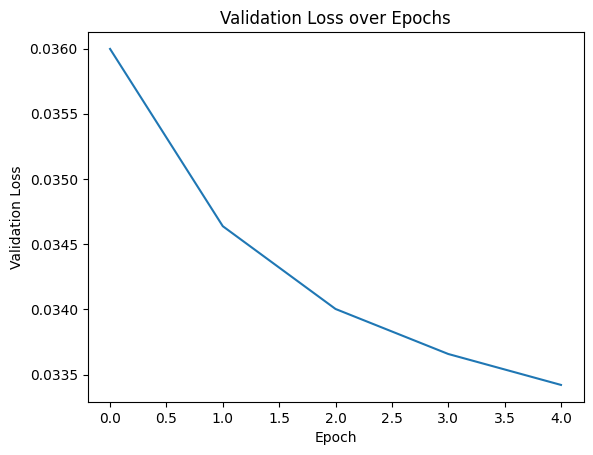

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A1Y1Y8X0.1/333-680',) y 348 y 117
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('I6NEA7.1/22-332',) y 311 y 76
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A0H3YJP0.1/580-733',) y 154 y 165
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A6P8HMM9.1/556-662',) y 107 y 108
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A2E2XEI3.1/363-477',) y 115 y 114
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A4Q8C0E3.1/247-363',) y 117 y 140
Test Loss: 0.03364353817730134


In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as plt

# datasets (train, validation, test)
dataset = [(embeddings_dict[sequence.split("/")[0]], conservation_scores, sequence) for sequence, conservation_scores in zip(sequences, conservation_scores_array)]
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, val_size, test_size])

# Creation data loaders for train, validation, and test
train_loader = data.DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Definition model
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# the training function
def train_model(model, optimizer, loss_fn, data_loader):
    model.train()
    for embedding, label, sequence in data_loader:
        optimizer.zero_grad()
        embedding = embedding.squeeze()
        label = label.squeeze()
        if embedding.size(0) != label.size(0):
            print(f"Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: {sequence} y {label.size(0)} y {embedding.size(0)}" )
            continue
        output = model(embedding).squeeze()
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()

# Define evaluation function
def evaluate_model(model, loss_fn, data_loader):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for embedding, label, sequence in data_loader:
            embedding = embedding.squeeze()
            label = label.squeeze()
            output = model(embedding).squeeze()
            if embedding.size(0) != label.size(0):
                print(f"Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: {sequence} y {label.size(0)} y {embedding.size(0)}" )
                continue
            loss = loss_fn(output, label)
            running_loss += loss.item()
    return running_loss / len(data_loader)

# On initialize the model, loss function, and optimizer with L2 regularization
model = LogisticRegression(input_size=320)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)  # Add weight_decay for L2 regularization

# Train the model
num_epochs = 5
val_losses = []
for epoch in range(num_epochs):
    train_model(model, optimizer, loss_fn, train_loader)
    val_loss = evaluate_model(model, loss_fn, val_loader)
    val_losses.append(val_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss}')

# Plot validation loss over epochs
plt.plot(val_losses)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs')
plt.show()

# Finally, on evalue on test set
test_loss = evaluate_model(model, loss_fn, test_loader)
print(f'Test Loss: {test_loss}')


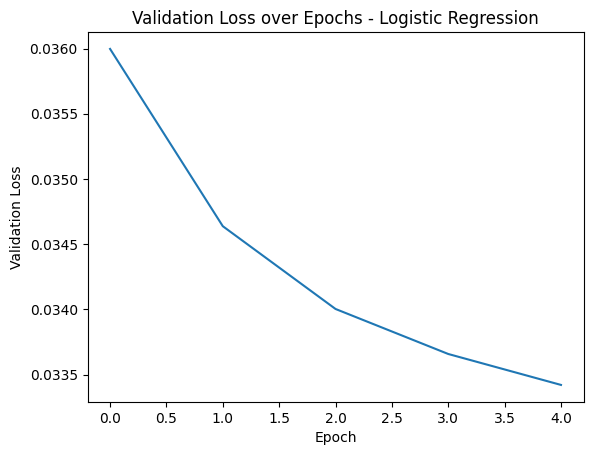

In [32]:
# Plot validation loss over epochs
plt.plot(val_losses)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs - Logistic Regression')
plt.show()

In [33]:
model.eval()
true_scores = []
predicted_scores = []
count = 0
with torch.no_grad():
    for embedding, label, sequence in test_loader:
        count = count + 1
        embedding = embedding.squeeze()
        label = label.squeeze()
        output = model(embedding).squeeze()
        if embedding.size(0) != label.size(0):
            print(f"Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: {sequence} y {label.size(0)} y {embedding.size(0)}" )
            continue
        if count == 2:
            print("label", label)
            print("output", output)
        true_scores.append(label)
        predicted_scores.append(output)

# Convertir les listes en tenseurs PyTorch
true_scores_tensor = torch.cat(true_scores)
predicted_scores_tensor = torch.cat(predicted_scores)

# Calculer le coefficient de corrélation de Pearson
pearson_corr = pearson_correlation(true_scores_tensor, predicted_scores_tensor)
print(f"Coefficient de corrélation de Pearson Logistic Regression: {pearson_corr}")

label tensor([0.4951, 0.5132, 0.6763, 0.3291, 0.2091, 0.7407, 0.4521, 0.3337, 0.7129,
        0.7520, 0.2849, 0.2842, 0.4734, 0.4189, 0.8223, 0.1920, 0.2603, 0.3767,
        0.3726, 0.5928, 0.4092, 0.6001, 0.5430, 0.5303, 0.5596, 0.1327, 0.4102,
        0.6626, 0.5283, 0.5825, 0.4880, 0.5791, 0.6719, 0.5522, 0.4407, 0.6875,
        0.6958, 0.7617, 0.4207, 0.5991, 0.6499, 0.5586, 0.4331, 0.3870, 0.5464,
        0.3660, 0.5566, 0.1310, 0.1760, 0.1912, 0.3792, 0.2091, 0.2278, 0.2615,
        0.5815, 0.4297, 0.4778, 0.4634, 0.3865, 0.8691, 0.5557, 0.7705, 0.4736,
        0.8306, 0.4265, 0.2854, 0.8262, 0.5879, 0.6045, 0.4167, 0.7251, 0.7642,
        0.2151, 0.6084, 0.2095, 0.4958, 0.8789, 0.4417, 0.7534, 0.5571, 0.8301,
        0.6685, 0.8989, 0.5752, 0.7158, 0.7114, 0.7515, 0.6909, 0.6387, 0.6245,
        0.5278, 0.8184, 0.6997, 0.7046, 0.3496, 0.4934, 0.5146, 0.5874, 0.1415,
        0.5771, 0.4153, 0.6357, 0.4900, 0.6006, 0.4624, 0.5435, 0.3237, 0.2469,
        0.4685, 0.3865, 0.5249, 0.

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('Q54EQ8.1/622-713',) y 92 y 76
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A6P7YWC7.1/4085-4167',) y 83 y 84
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A259HE10.1/43-148',) y 106 y 208
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A0H3YJP0.1/580-733',) y 154 y 165
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('K2IS43.1/381-491',) y 111 y 198
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A0L0SP69.1/898-991',) y 94 y 267
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A7M7P1K2.1/230-388',) y 159 y 190
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A2E2XEI3.1/363-477',) y 115 y 114
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A4Q8C0E3.1/247-363',

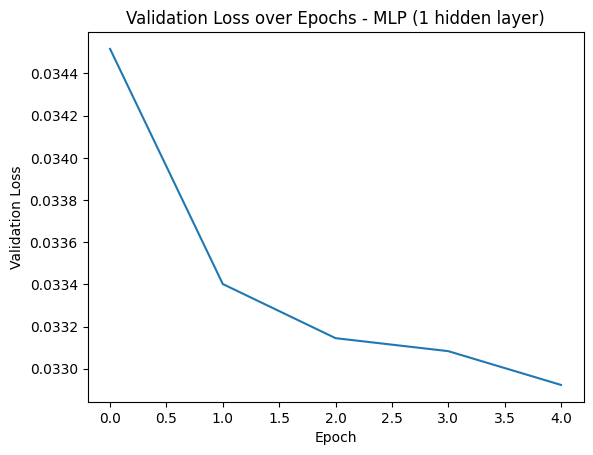

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('R4K6S0.1/243-358',) y 116 y 81
Test Loss: 0.033302739102169125


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as plt
# datasets (train, validation, test)
dataset = [(embeddings_dict[sequence.split("/")[0]], conservation_scores, sequence) for sequence, conservation_scores in zip(sequences, conservation_scores_array)]
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, val_size, test_size])

# Création des data loaders pour train, validation et test
train_loader = data.DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Définition du modèle MLP
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(MLP, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.ReLU())
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_size, 1))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Fonction de formation
def train_model(model, optimizer, loss_fn, data_loader):
    model.train()
    for embedding, label, sequence in data_loader:
        optimizer.zero_grad()
        embedding = embedding.squeeze()
        label = label.squeeze()
        if embedding.size(0) != label.size(0):
            print(f"La taille des tenseurs de sortie et d'étiquette ne correspond pas pour la séquence: {sequence} y {label.size(0)} y {embedding.size(0)}")
            continue
        output = model(embedding).squeeze()
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()

# Fonction d'évaluation
def evaluate_model(model, loss_fn, data_loader):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for embedding, label, sequence in data_loader:
            embedding = embedding.squeeze()
            label = label.squeeze()
            output = model(embedding).squeeze()
            if embedding.size(0) != label.size(0):
                print(f"La taille des tenseurs de sortie et d'étiquette ne correspond pas pour la séquence: {sequence} y {label.size(0)} y {embedding.size(0)}")
                continue
            loss = loss_fn(output, label)
            running_loss += loss.item()
    return running_loss / len(data_loader)

# Initialiser le modèle, la fonction de perte et l'optimiseur avec régularisation L2
input_size = 320  # taille d'entrée
hidden_size = 128  # Taille des couches cachées
num_layers = 1  # Nombre de couches cachées

model = MLP(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=0.01)  # Ajout de weight_decay pour la régularisation L2

# Entraîner le modèle
num_epochs = 5
val_losses = []
for epoch in range(num_epochs):
    train_model(model, optimizer, loss_fn, train_loader)
    val_loss = evaluate_model(model, loss_fn, val_loader)
    val_losses.append(val_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss}')

# Tracer la perte de validation au fil des époques
plt.plot(val_losses)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs - MLP (1 hidden layer)')
plt.show()

# Évaluer finalement sur l'ensemble de test
test_loss = evaluate_model(model, loss_fn, test_loader)
print(f'Test Loss: {test_loss}')


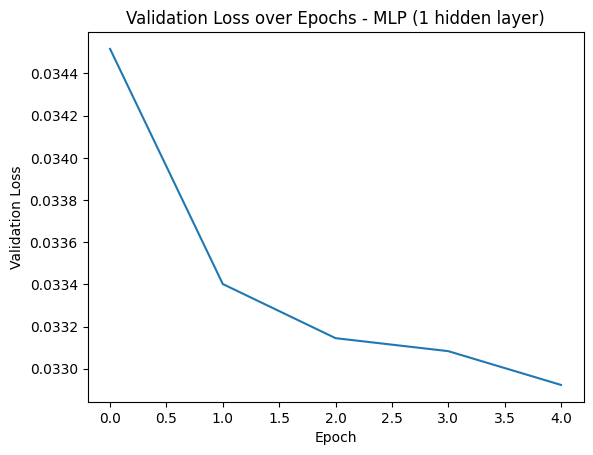

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('R4K6S0.1/243-358',) y 116 y 81
Test Loss: 0.033302739102169125


In [11]:
# Tracer la perte de validation au fil des époques
plt.plot(val_losses)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs - MLP (1 hidden layer)')
plt.show()

# Évaluer finalement sur l'ensemble de test
test_loss = evaluate_model(model, loss_fn, test_loader)
print(f'Test Loss: {test_loss}')

In [14]:
model.eval()
true_scores = []
predicted_scores = []
count = 0
with torch.no_grad():
    for embedding, label, sequence in test_loader:
        count = count + 1
        embedding = embedding.squeeze()
        label = label.squeeze()
        output = model(embedding).squeeze()
        if embedding.size(0) != label.size(0):
            print(f"La taille des tenseurs de sortie et d'étiquette ne correspond pas pour la séquence: {sequence} y {label.size(0)} y {embedding.size(0)}" )
            continue
        if count == 2:
            print("label", label)
            print("output", output)
        true_scores.append(label)
        predicted_scores.append(output)

# Convertir les listes en tenseurs PyTorch
true_scores_tensor = torch.cat(true_scores)
predicted_scores_tensor = torch.cat(predicted_scores)

# Calculer le coefficient de corrélation de Pearson
pearson_corr = pearson_correlation(true_scores_tensor, predicted_scores_tensor)
print(f"Coefficient de corrélation de Pearson MLP (1 hidden layer): {pearson_corr}")

label tensor([0.1895, 0.1392, 0.4331, 0.7090, 0.1962, 0.3525, 0.2404, 0.1301, 0.5806,
        0.4275, 0.4441, 0.0877, 0.0408, 0.1643, 0.0712, 0.1196, 0.1483, 0.2057,
        0.0948, 0.1344, 0.4429, 0.1787, 0.1471, 0.2106, 0.5684, 0.1528, 0.1416,
        0.3682, 0.6294, 0.7212, 0.1595, 0.3403, 0.1484, 0.1157, 0.0976, 0.0660,
        0.1108, 0.1343, 0.1460, 0.1271, 0.1802, 0.3042, 0.3430, 0.1412, 0.1547,
        0.1012, 0.0536, 0.0513, 0.0679, 0.0481, 0.0463, 0.1147, 0.0698, 0.1017,
        0.2759, 0.4614, 0.2451, 0.2542, 0.2045, 0.7930, 0.5654, 0.1191, 0.3953,
        0.7373, 0.3713, 0.2377, 0.2100, 0.2649, 0.2125, 0.3452, 0.3601, 0.3538,
        0.1548, 0.1709, 0.1646, 0.5078])
output tensor([0.3387, 0.3373, 0.3595, 0.3900, 0.3826, 0.3893, 0.3793, 0.3510, 0.4330,
        0.4937, 0.3617, 0.3462, 0.3688, 0.3233, 0.3268, 0.3256, 0.3543, 0.3830,
        0.2320, 0.2483, 0.4298, 0.3625, 0.2577, 0.2964, 0.4186, 0.2653, 0.2621,
        0.3027, 0.3959, 0.4652, 0.2655, 0.3416, 0.3186, 0.2917, 0.

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A2E2XEI3.1/363-477',) y 115 y 114
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A0L0SP69.1/898-991',) y 94 y 267
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A553PFE8.1/1433-1850',) y 418 y 69
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('V3Z1U4.1/125-374',) y 250 y 44
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('I0R687.1/331-428',) y 98 y 44
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A259HE10.1/43-148',) y 106 y 208
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A6V2YLE5.1/558-674',) y 117 y 60
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A4Q8C0E3.1/247-363',) y 117 y 140
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('K2IS43.1/381-491',) y 1

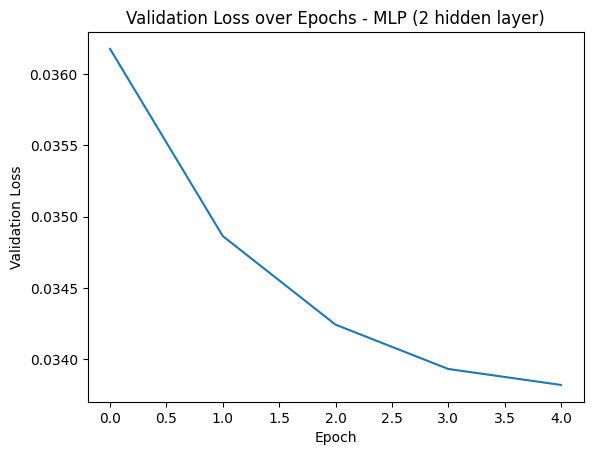

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('Q54EQ8.1/622-713',) y 92 y 76
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A1Y1Y8X0.1/333-680',) y 348 y 117
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A0H3YJP0.1/580-733',) y 154 y 165
Test Loss: 0.03377675895559432


In [16]:
# datasets (train, validation, test)
dataset = [(embeddings_dict[sequence.split("/")[0]], conservation_scores, sequence) for sequence, conservation_scores in zip(sequences, conservation_scores_array)]
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, val_size, test_size])

# Création des data loaders pour train, validation et test
train_loader = data.DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Définition du modèle MLP 2 couches
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(MLP, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.ReLU())
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_size, 1))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Fonction de formation
def train_model(model, optimizer, loss_fn, data_loader):
    model.train()
    for embedding, label, sequence in data_loader:
        optimizer.zero_grad()
        embedding = embedding.squeeze()
        label = label.squeeze()
        if embedding.size(0) != label.size(0):
            print(f"La taille des tenseurs de sortie et d'étiquette ne correspond pas pour la séquence: {sequence} y {label.size(0)} y {embedding.size(0)}")
            continue
        output = model(embedding).squeeze()
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()

# Fonction d'évaluation
def evaluate_model(model, loss_fn, data_loader):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for embedding, label, sequence in data_loader:
            embedding = embedding.squeeze()
            label = label.squeeze()
            output = model(embedding).squeeze()
            if embedding.size(0) != label.size(0):
                print(f"La taille des tenseurs de sortie et d'étiquette ne correspond pas pour la séquence: {sequence} y {label.size(0)} y {embedding.size(0)}")
                continue
            loss = loss_fn(output, label)
            running_loss += loss.item()
    return running_loss / len(data_loader)

# Initialiser le modèle, la fonction de perte et l'optimiseur avec régularisation L2
input_size = 320  # taille d'entrée
hidden_size = 128  # Taille des couches cachées
num_layers = 2  # Nombre de couches cachées

model = MLP(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=0.01)  # Ajout de weight_decay pour la régularisation L2

# Entraîner le modèle
num_epochs = 5
val_losses = []
for epoch in range(num_epochs):
    train_model(model, optimizer, loss_fn, train_loader)
    val_loss = evaluate_model(model, loss_fn, val_loader)
    val_losses.append(val_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss}')

# Tracer la perte de validation au fil des époques
plt.plot(val_losses)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs - MLP (2 hidden layer)')
plt.show()

# Évaluer finalement sur l'ensemble de test
test_loss = evaluate_model(model, loss_fn, test_loader)
print(f'Test Loss: {test_loss}')


In [17]:
model.eval()
true_scores = []
predicted_scores = []
count = 0
with torch.no_grad():
    for embedding, label, sequence in test_loader:
        count = count + 1
        embedding = embedding.squeeze()
        label = label.squeeze()
        output = model(embedding).squeeze()
        if embedding.size(0) != label.size(0):
            print(f"La taille des tenseurs de sortie et d'étiquette ne correspond pas pour la séquence: {sequence} y {label.size(0)} y {embedding.size(0)}" )
            continue
        if count == 2:
            print("label", label)
            print("output", output)
        true_scores.append(label)
        predicted_scores.append(output)

# Convertir les listes en tenseurs PyTorch
true_scores_tensor = torch.cat(true_scores)
predicted_scores_tensor = torch.cat(predicted_scores)

# Calculer le coefficient de corrélation de Pearson
pearson_corr = pearson_correlation(true_scores_tensor, predicted_scores_tensor)
print(f"Coefficient de corrélation de Pearson MLP (2 hidden layer): {pearson_corr}")

label tensor([0.1192, 0.2942, 0.2644, 0.2759, 0.2583, 0.6729, 0.3403, 0.2949, 0.2776,
        0.3772, 0.2229, 0.3069, 0.5059, 0.1797, 0.2725, 0.4180, 0.6069, 0.1851,
        0.3726, 0.5220, 0.2366, 0.5786, 0.7217, 0.6221, 0.5518, 0.6655, 0.7808,
        0.3953, 0.6025, 0.5591, 0.3220, 0.3760, 0.3032, 0.1036, 0.2534, 0.3162,
        0.1393, 0.2373, 0.0892, 0.0717, 0.2301, 0.5576, 0.3276, 0.4390, 0.3542,
        0.5142, 0.4094, 0.4402, 0.6978, 0.3301, 0.3635, 0.7520, 0.1649, 0.2974,
        0.4355, 0.4287, 0.6250, 0.3628, 0.5947, 0.7178, 0.1687, 0.2561, 0.2485,
        0.6318, 0.3960, 0.3008, 0.2256, 0.2515, 0.5752, 0.4617, 0.5840, 0.3450,
        0.7671, 0.4602, 0.4456, 0.3684, 0.7104, 0.3367, 0.3176, 0.2932, 0.2145,
        0.2015])
output tensor([0.4310, 0.4090, 0.3828, 0.4218, 0.3753, 0.3890, 0.3782, 0.3600, 0.3780,
        0.3638, 0.3733, 0.3649, 0.3629, 0.3326, 0.3800, 0.3170, 0.3177, 0.3032,
        0.3134, 0.2826, 0.2436, 0.2910, 0.3437, 0.3048, 0.2671, 0.3041, 0.3230,
        0.

/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([105])) that is different to the input size (torch.Size([105, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([94])) that is different to the input size (torch.Size([94, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([36])) that is different to the input size (torch.Size([36, 1])). This will likely lead to incorrect results due to broadcasting. Please ensur

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('I6NEA7.1/22-332',) y 311 y 76


/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([186])) that is different to the input size (torch.Size([186, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([93])) that is different to the input size (torch.Size([93, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([118])) that is different to the input size (torch.Size([118, 1])). This will likely lead to incorrect results due to broadcasting. Please ens

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('I0R687.1/331-428',) y 98 y 44


/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([318])) that is different to the input size (torch.Size([318, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([494])) that is different to the input size (torch.Size([494, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([450])) that is different to the input size (torch.Size([450, 1])). This will likely lead to incorrect results due to broadcasting. Please e

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('R4K6S0.1/243-358',) y 116 y 81


/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([370])) that is different to the input size (torch.Size([370, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([643])) that is different to the input size (torch.Size([643, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([484])) that is different to the input size (torch.Size([484, 1])). This will likely lead to incorrect results due to broadcasting. Please e

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A259HE10.1/43-148',) y 106 y 208


/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([574])) that is different to the input size (torch.Size([574, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([509])) that is different to the input size (torch.Size([509, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([575])) that is different to the input size (torch.Size([575, 1])). This will likely lead to incorrect results due to broadcasting. Please e

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('K2IS43.1/381-491',) y 111 y 198


/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([524])) that is different to the input size (torch.Size([524, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure 

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A4Q8C0E3.1/247-363',) y 117 y 140


/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([644])) that is different to the input size (torch.Size([644, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A0L0SP69.1/898-991',) y 94 y 267


/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([842])) that is different to the input size (torch.Size([842, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([723])) that is different to the input size (torch.Size([723, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([688])) that is different to the input size (torch.Size([688, 1])). This will likely lead to incorrect results due to broadcasting. Please e

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A6P7YWC7.1/4085-4167',) y 83 y 84


/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([828])) that is different to the input size (torch.Size([828, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([866])) that is different to the input size (torch.Size([866, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([999])) that is different to the input size (torch.Size([999, 1])). This will likely lead to incorrect results due to broadcasting. Please e

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('Q54EQ8.1/622-713',) y 92 y 76


/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([714])) that is different to the input size (torch.Size([714, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([618])) that is different to the input size (torch.Size([618, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([485])) that is different to the input size (torch.Size([485, 1])). This will likely lead to incorrect results due to broadcasting. Please e

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A6P8HMM9.1/556-662',) y 107 y 108


/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([478])) that is different to the input size (torch.Size([478, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([885])) that is different to the input size (torch.Size([885, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([991])) that is different to the input size (torch.Size([991, 1])). This will likely lead to incorrect results due to broadcasting. Please e

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A7M7P1K2.1/230-388',) y 159 y 190


/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([943])) that is different to the input size (torch.Size([943, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([640])) that is different to the input size (torch.Size([640, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([571])) that is different to the input size (torch.Size([571, 1])). This will likely lead to incorrect results due to broadcasting. Please e

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A6V2YLE5.1/558-674',) y 117 y 60


/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([620])) that is different to the input size (torch.Size([620, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([952])) that is different to the input size (torch.Size([952, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([931])) that is different to the input size (torch.Size([931, 1])). This will likely lead to incorrect results due to broadcasting. Please e

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('V3Z1U4.1/125-374',) y 250 y 44


/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([630])) that is different to the input size (torch.Size([630, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([687])) that is different to the input size (torch.Size([687, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([801])) that is different to the input size (torch.Size([801, 1])). This will likely lead to incorrect results due to broadcasting. Please e

Epoch 1/5, Validation Loss: 0.04031432110757383
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A0L0SP69.1/898-991',) y 94 y 267
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A6V2YLE5.1/558-674',) y 117 y 60
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A6P7YWC7.1/4085-4167',) y 83 y 84
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A4Q8C0E3.1/247-363',) y 117 y 140
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('R4K6S0.1/243-358',) y 116 y 81
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('I6NEA7.1/22-332',) y 311 y 76
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A259HE10.1/43-148',) y 106 y 208
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('I0R687.1/331-428',) y 98 y 44
Tamaño de los tensores de salida y etiqueta no coinciden par

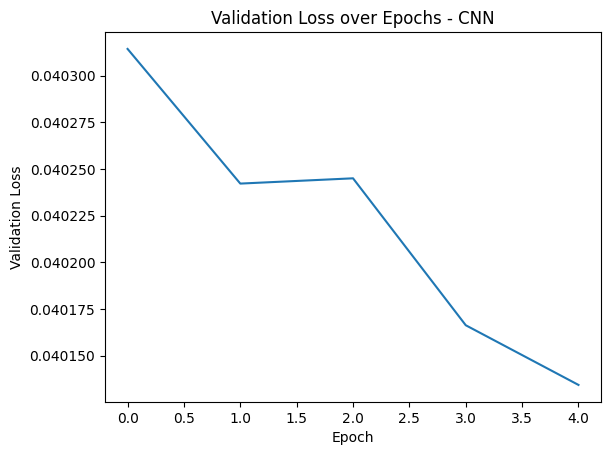

/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([860])) that is different to the input size (torch.Size([860, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([746])) that is different to the input size (torch.Size([746, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A553PFE8.1/1433-1850',) y 418 y 69
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A1Y1Y8X0.1/333-680',) y 348 y 117


/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([905])) that is different to the input size (torch.Size([905, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([718])) that is different to the input size (torch.Size([718, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([858])) that is different to the input size (torch.Size([858, 1])). This will likely lead to incorrect results due to broadcasting. Please e

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A2E2XEI3.1/363-477',) y 115 y 114


/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([751])) that is different to the input size (torch.Size([751, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([637])) that is different to the input size (torch.Size([637, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([692])) that is different to the input size (torch.Size([692, 1])). This will likely lead to incorrect results due to broadcasting. Please e

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A0H3YJP0.1/580-733',) y 154 y 165


/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([626])) that is different to the input size (torch.Size([626, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([807])) that is different to the input size (torch.Size([807, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/patyarakawa/mi_entorno/lib/python3.8/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([680])) that is different to the input size (torch.Size([680, 1])). This will likely lead to incorrect results due to broadcasting. Please e

Test Loss: 0.04017674030624648


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Chargement des données (train, validation, test)
dataset = [(embeddings_dict[sequence.split("/")[0]], conservation_scores, sequence) for sequence, conservation_scores in zip(sequences, conservation_scores_array)]
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

# Création des data loaders pour train, validation et test
train_loader = data.DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Définition du modèle CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=9)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=9)
        
        # Calcule la taille de sortie des convolutions
        self._to_linear = None
        self.convs(torch.randn(1, 1, 320))  # tensor d'entrée de taille (batch_size, in_channels, input_length)
        
        self.fc1 = nn.Linear(self._to_linear, 128)
        self.fc2 = nn.Linear(128, 1)

    def convs(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        if self._to_linear is None:
            self._to_linear = x.shape[1] * x.shape[2]
        return x

    def forward(self, x):
        x = x.unsqueeze(1)  # Ajoute une dimension pour le canal
        x = self.convs(x)
        x = x.view(x.size(0), -1)  # Aplatissement
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Fonction de formation
def train_model(model, optimizer, loss_fn, data_loader):
    model.train()
    for embedding, label, sequence in data_loader:
        optimizer.zero_grad()
        embedding = embedding.squeeze()
        label = label.squeeze()
        if embedding.size(0) != label.size(0):
            print(f"La taille des tenseurs de sortie et d'étiquette ne correspond pas pour la séquence: {sequence} y {label.size(0)} y {embedding.size(0)}")
            continue
        output = model(embedding)
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()

# Fonction d'évaluation
def evaluate_model(model, loss_fn, data_loader):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for embedding, label, sequence in data_loader:
            embedding = embedding.squeeze()
            label = label.squeeze()
            output = model(embedding)
            if embedding.size(0) != label.size(0):
                print(f"La taille des tenseurs de sortie et d'étiquette ne correspond pas pour la séquence: {sequence} y {label.size(0)} y {embedding.size(0)}")
                continue
            loss = loss_fn(output, label)
            running_loss += loss.item()
    return running_loss / len(data_loader)

# Initialiser le modèle, la fonction de perte et l'optimiseur avec régularisation L2
model = CNN()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, weight_decay=0.01)  # Réduisez lr pour une stabilisation

# Entraîner le modèle
num_epochs = 5
val_losses = []
for epoch in range(num_epochs):
    train_model(model, optimizer, loss_fn, train_loader)
    val_loss = evaluate_model(model, loss_fn, val_loader)
    val_losses.append(val_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss}')

# Tracer la perte de validation au fil des époques
plt.plot(val_losses)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs - CNN')
plt.show()

# Évaluer finalement sur l'ensemble de test
test_loss = evaluate_model(model, loss_fn, test_loader)
print(f'Test Loss: {test_loss}')


## 2 CNN

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Chargement des données (train, validation, test)
dataset = [(embeddings_dict[sequence.split("/")[0]], conservation_scores, sequence) for sequence, conservation_scores in zip(sequences, conservation_scores_array)]
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

# Création des data loaders pour train, validation et test
train_loader = data.DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Définition du modèle CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3)
        self.fc1 = nn.Linear(64 * (320 - 4), 128)  # Remplacez 64 * (tailleSeq - 4) par la taille après aplatissement
        self.fc2 = nn.Linear(128, 320)  # La sortie est un vecteur de taille 320

    def forward(self, x):
        x = x.unsqueeze(1)  # Ajoute une dimension pour le canal
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Aplatissement
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Fonction de formation
def train_model(model, optimizer, loss_fn, data_loader):
    model.train()
    for embedding, label, sequence in data_loader:
        optimizer.zero_grad()
        embedding = embedding.squeeze()
        label = label.squeeze()
        output = model(embedding)
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()

# Fonction d'évaluation
def evaluate_model(model, loss_fn, data_loader):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for embedding, label, sequence in data_loader:
            embedding = embedding.squeeze()
            label = label.squeeze()
            output = model(embedding)
            loss = loss_fn(output, label)
            running_loss += loss.item()
    return running_loss / len(data_loader)

# Initialiser le modèle, la fonction de perte et l'optimiseur avec régularisation L2
model = CNN()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay=0.01)  # Ajout de weight_decay pour la régularisation L2

# Entraîner le modèle
num_epochs = 5
val_losses = []
for epoch in range(num_epochs):
    train_model(model, optimizer, loss_fn, train_loader)
    val_loss = evaluate_model(model, loss_fn, val_loader)
    val_losses.append(val_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_loss}')

# Tracer la perte de validation au fil des époques
plt.plot(val_losses)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs - CNN')
plt.show()

# Évaluer finalement sur l'ensemble de test
test_loss = evaluate_model(model, loss_fn, test_loader)
print(f'Test Loss: {test_loss}')


NameError: name 'tailleSeq' is not defined

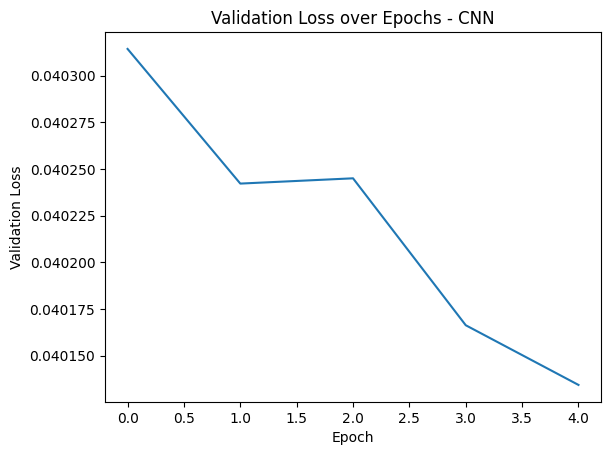

Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A553PFE8.1/1433-1850',) y 418 y 69
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A1Y1Y8X0.1/333-680',) y 348 y 117
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A2E2XEI3.1/363-477',) y 115 y 114
Tamaño de los tensores de salida y etiqueta no coinciden para la secuencia: ('A0A0H3YJP0.1/580-733',) y 154 y 165
Test Loss: 0.04017674030624648


In [6]:
# Tracer la perte de validation au fil des époques
plt.plot(val_losses)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss over Epochs - CNN')
plt.show()

# Évaluer finalement sur l'ensemble de test
test_loss = evaluate_model(model, loss_fn, test_loader)
print(f'Test Loss: {test_loss}')

In [9]:
model.eval()
true_scores = []
predicted_scores = []
count = 0
with torch.no_grad():
    for embedding, label, sequence in test_loader:
        count = count + 1
        embedding = embedding.squeeze()
        label = label.squeeze()
        output = model(embedding).squeeze()
        if embedding.size(0) != label.size(0):
            print(f"La taille des tenseurs de sortie et d'étiquette ne correspond pas pour la séquence: {sequence} y {label.size(0)} y {embedding.size(0)}" )
            continue
        if count == 2:
            print("label", label)
            print("output", output)
        true_scores.append(label)
        predicted_scores.append(output)

# Convertir les listes en tenseurs PyTorch
true_scores_tensor = torch.cat(true_scores)
predicted_scores_tensor = torch.cat(predicted_scores)

# Calculer le coefficient de corrélation de Pearson
pearson_corr = pearson_correlation(true_scores_tensor, predicted_scores_tensor)
print(f"Coefficient de corrélation de Pearson CNN: {pearson_corr}")

label tensor([0.2382, 0.2698, 0.2325, 0.2319, 0.1912, 0.2350, 0.2157, 0.2134, 0.1652,
        0.4375, 0.3711, 0.4460, 0.3601, 0.5029, 0.5835, 0.3574, 0.4172, 0.5703,
        0.3882, 0.3254, 0.3430, 0.2810, 0.3521, 0.6079, 0.3127, 0.5283, 0.5986,
        0.8018, 0.4656, 0.4661, 0.5078, 0.6294, 0.6494, 0.3188, 0.7900, 0.4951,
        0.6060, 0.4810, 0.7036, 0.5308, 0.6470, 0.3459, 0.2927, 0.2817, 0.3184,
        0.4409, 0.3145, 0.7686, 0.8027, 0.6406, 0.6001, 0.6948, 0.5298, 0.6382,
        0.4951, 0.4111, 0.2477, 0.5063, 0.8838, 0.7817, 0.6841, 0.4036, 0.5068,
        0.4602, 0.2385, 0.4651, 0.1425, 0.2052, 0.3018, 0.7378, 0.5752, 0.3027,
        0.3740, 0.8110, 0.3689, 0.2725, 0.6440, 0.4160, 0.3716, 0.6118, 0.5332,
        0.1941, 0.2991, 0.6602, 0.6333, 0.4111, 0.2542, 0.5645, 0.4744, 0.5127,
        0.4558, 0.3684, 0.3999, 0.6387, 0.4182, 0.6377, 0.5229, 0.4417, 0.3647,
        0.3340, 0.3213, 0.4236, 0.5024, 0.2788, 0.4954, 0.3628, 0.2349, 0.4036,
        0.4761, 0.3093, 0.5693, 0.

In [ ]:
import pandas as pd
if False:
    # Lire le fichier CSV
    csv_file = "curated_dataset/conservation_scores_formated.csv"
    df = pd.read_csv(csv_file)
    
    # Filtrer les lignes du DataFrame en fonction des clés du dictionnaire
    filtered_rows = []
    for index, row in df.iterrows():
        sequence_id = row["sequence id"].split("/")[0]  # Obtenir le préfixe de l'ID de séquence
        if sequence_id in embeddings_dict:
            print("Correspondance trouvée", sequence_id)
            filtered_rows.append(row)
    
    # Créer un nouveau DataFrame avec les lignes filtrées
    filtered_df = pd.DataFrame(filtered_rows)
    
    # Enregistrer le DataFrame filtré dans un nouveau fichier CSV
    filtered_csv_file = "curated_dataset/filtered_conservation_scores.csv"
    filtered_df.to_csv(filtered_csv_file, index=False)
    
    print("Filtrage terminé. Le fichier filtré a été enregistré sous :", filtered_csv_file)


In [ ]:
from transformers import AutoTokenizer, EsmModel
import torch
from Bio import SeqIO
import os

# Charger le tokenizer et le modèle
tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t6_8M_UR50D")
model = EsmModel.from_pretrained("facebook/esm2_t6_8M_UR50D")

# Fonction pour générer les vecteurs d'embedding d'une séquence
def generate_embedding(sequence):
    inputs = tokenizer(sequence, return_tensors="pt")
    outputs = model(**inputs)
    # Squeeze pour enlever la dimension de lot
    embedding = outputs.last_hidden_state.squeeze(0)
    # Enlever la première et la dernière ligne
    embedding = embedding[1:-1, :]
    return embedding

# Créer un répertoire pour stocker les embeddings

# Lire le fichier fasta et traiter les séquences
fasta_file = "curated_dataset/reduced_input_20000.fasta"
count = 0
if False:
    for record in SeqIO.parse(fasta_file, "fasta"):
        count = count + 1
        sequence_id = record.id.split('/')[0]
        # sequence_id = sequence_id.replace('.', '')
        sequence_id_complement = record.id.split('/')[1]
        sequence = str(record.seq)
    
        # Générer l'embedding pour la séquence actuelle
        embedding = generate_embedding(sequence)
        output_file = f"curated_dataset/individual_embeddings/{sequence_id}.pt"
        # os.makedirs(os.path.dirname(output_file), exist_ok=True)
        # Enregistrer l'embedding dans un fichier .pt dans le répertoire de la séquence
        torch.save(embedding, output_file)
    
        print(
            f"Embedding {count} généré et sauvegardé pour la séquence {sequence_id}")

    print("Processus terminé.")


In [18]:
from transformers import AutoTokenizer, EsmModel
import torch
from Bio import SeqIO
import os

# Charger le tokenizer et le modèle
tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t6_8M_UR50D")
model = EsmModel.from_pretrained("facebook/esm2_t6_8M_UR50D")

def generate_embedding(sequence):
    inputs = tokenizer(sequence, return_tensors="pt")
    outputs = model(**inputs)
    # Squeeze pour enlever la dimension de lot
    embedding = outputs.last_hidden_state.squeeze(0)
    # Enlever la première et la dernière ligne
    embedding = embedding[1:-1, :]
    return embedding

Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t6_8M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:
embedding_1btk = generate_embedding("AAVILESIFLKRSQQKKKTSPLNFKKCLFLLTVHKLSYYEYDFERGRRGSKKGSIDVEKITCVETVVPEKNPPPERQIPRRGEESSEMEQISIIERFPYPFQVVYDEGPLYVFSPTEELRKRWIHQLKNVIRYNSDLVQKYHPCFWIDGQYLCCSQTAKNAMGCQILEN")

In [34]:
embedding_1btk

tensor([[ 0.1246,  0.2177, -0.0609,  ...,  0.1311,  0.2336, -0.0956],
        [ 0.0979, -0.0464, -0.0279,  ..., -0.0412,  0.1485,  0.0365],
        [ 0.0046, -0.1843,  0.3125,  ...,  0.3578,  0.2835,  0.1302],
        ...,
        [ 0.1103, -0.2611,  0.3035,  ..., -0.0811, -0.0425,  0.0694],
        [-0.0162, -0.6340,  0.3425,  ..., -0.1947,  0.1116,  0.3056],
        [ 0.1330, -0.1816,  0.2326,  ..., -0.1703, -0.2321, -0.0649]],
       grad_fn=<SliceBackward0>)

In [30]:
len(embedding_1btk)

169

In [31]:
def read_conservation_scores(file):
    conservation_scores = []

    with open(file, 'r') as f:
        lines = f.readlines()[29:198]  # Lire de la ligne 30 à la 198
        for line in lines:
            score_str = line[18:24].strip().rstrip(',')  # Extraire les scores de conservation, enlever les espaces blancs et les virgules
            # if score_str.startswith('-'):

            if score_str.strip():  
                score = float(score_str) 
                conservation_scores.append(score)

    return conservation_scores


scores_1btk = read_conservation_scores("Consurf_Outputs_1716245811/1BTK_A_consurf_grades.txt")
print(scores_1btk)


[-1.034, 1.584, 2.128, -0.496, -0.895, -0.654, -0.327, 0.884, -0.806, -0.203, -1.255, -0.956, -1.275, -1.262, -1.216, -1.129, -0.653, -0.653, -0.587, -1.153, -1.052, 0.584, -1.137, -0.547, -1.199, -0.515, -1.144, -0.019, -1.231, -0.131, -1.066, -1.09, 0.647, 1.188, 0.741, -0.52, -0.083, -1.226, -0.865, -0.322, 0.736, -0.276, 1.574, 0.716, -0.123, 0.522, -0.293, -0.051, 0.221, 1.105, 0.541, -0.462, -1.055, -0.198, -0.571, 0.301, 1.017, 0.742, -0.154, -0.642, 0.187, -0.698, -0.827, -0.735, 0.66, -1.181, 2.529, 0.857, 0.27, 2.583, 2.015, -0.141, -1.089, 1.253, 0.747, -0.409, -0.238, 1.987, 2.598, 0.86, 0.392, 0.171, 2.135, 0.879, 2.613, 0.88, 1.827, 1.391, -0.086, -0.632, -0.126, -0.129, -0.064, -0.779, -0.827, -0.839, -0.298, -0.411, 0.333, -0.776, -0.581, -1.038, -0.185, 0.0, -0.31, -0.802, 0.988, 0.191, -0.098, -1.07, -1.043, 0.272, -0.779, -0.894, -0.164, 0.187, 0.394, 1.087, -0.29, -0.972, 2.4, 2.018, -1.157, -0.526, 1.101, 0.639, -0.288, -0.329, 2.612, 0.253, -0.534, 0.703, 1.257, -

In [1]:
min_score = min(scores_1btk)
max_score = max(scores_1btk)

normalized_scores_1btk = [(score - min_score) / (max_score - min_score) for score in scores_1btk]

print(normalized_scores_1btk)
len(normalized_scores_1btk)

NameError: name 'scores_1btk' is not defined

In [38]:
import torch


model.eval()

if not isinstance(embedding_1btk, torch.Tensor):
    embedding_1btk = torch.tensor(embedding_1btk, dtype=torch.float32)


if len(embedding_1btk.shape) == 1:
    embedding_1btk = embedding_1btk.unsqueeze(0)

with torch.no_grad():
    predicted_scores_1btk = model(embedding_1btk)

print("Scores de conservation prédits :", predicted_scores_1btk)


Predicted Conservation Scores: tensor([[0.3157],
        [0.2815],
        [0.3039],
        [0.3406],
        [0.3480],
        [0.3223],
        [0.3181],
        [0.3686],
        [0.4091],
        [0.3230],
        [0.2986],
        [0.3082],
        [0.3047],
        [0.2577],
        [0.2479],
        [0.2697],
        [0.2767],
        [0.2532],
        [0.2249],
        [0.2779],
        [0.3256],
        [0.2776],
        [0.3079],
        [0.3785],
        [0.3213],
        [0.3516],
        [0.5597],
        [0.4152],
        [0.5192],
        [0.4102],
        [0.4308],
        [0.3898],
        [0.3709],
        [0.3935],
        [0.3477],
        [0.3531],
        [0.3490],
        [0.4878],
        [0.4960],
        [0.3649],
        [0.4835],
        [0.4257],
        [0.3413],
        [0.3124],
        [0.3090],
        [0.4117],
        [0.3377],
        [0.3163],
        [0.3770],
        [0.2869],
        [0.2839],
        [0.2382],
        [0.3175],
        [0.2464

In [39]:
import torch

diff_score_1btk = torch.tensor(scores_1btk) - predicted_scores_1btk

print("diff_score_1btk:", diff_score_1btk)


Diferencia entre scores originales y predichos: tensor([[-1.3497,  1.2683,  1.8123,  ..., -0.8147, -0.3487, -1.2927],
        [-1.3155,  1.3025,  1.8465,  ..., -0.7805, -0.3145, -1.2585],
        [-1.3379,  1.2801,  1.8241,  ..., -0.8029, -0.3369, -1.2809],
        ...,
        [-1.3473,  1.2707,  1.8147,  ..., -0.8123, -0.3463, -1.2903],
        [-1.3359,  1.2821,  1.8261,  ..., -0.8009, -0.3349, -1.2789],
        [-1.3484,  1.2696,  1.8136,  ..., -0.8134, -0.3474, -1.2914]])


In [40]:
import torch

def min_max_normalize(data):
    min_val = torch.min(data)
    max_val = torch.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data


diff_score_1btk_normalized = min_max_normalize(diff_score_1btk)
print(diff_score_1btk_normalized)


tensor([[0.1240, 0.7269, 0.8522,  ..., 0.2472, 0.3545, 0.1371],
        [0.1319, 0.7348, 0.8601,  ..., 0.2551, 0.3624, 0.1450],
        [0.1267, 0.7296, 0.8549,  ..., 0.2499, 0.3572, 0.1398],
        ...,
        [0.1245, 0.7274, 0.8527,  ..., 0.2477, 0.3551, 0.1377],
        [0.1272, 0.7301, 0.8554,  ..., 0.2504, 0.3577, 0.1403],
        [0.1243, 0.7272, 0.8525,  ..., 0.2475, 0.3548, 0.1374]])


In [41]:
def replace_scores_in_pdb(pdb_file, scores_array, normalized_tensor, output_file):
    # Ouvre le fichier PDB original en lecture
    with open(pdb_file, 'r') as f:
        lines = f.readlines()

    # Indice pour parcourir le tenseur normalisé
    tensor_index = 0

    # Parcours chaque ligne du fichier PDB
    for i, line in enumerate(lines):
        # Vérifie si la ligne contient les scores à remplacer
        if 506 <= i + 1 <= 1823:
            # Obtient le nombre de la colonne 61 à 66
            original_score = float(line[60:66])

            # Compare le score original avec les scores du tableau
            if original_score == scores_array[tensor_index]:
                # Remplace le score original par la valeur du tenseur normalisé
                new_score = normalized_tensor[tensor_index].tolist()  # Convertit le tenseur en liste
                lines[i] = line[:60] + f"{new_score[0]:6.2f}" + line[66:]
                tensor_index += 1

        # Vérifie si tous les scores ont déjà été traités
        if tensor_index >= len(normalized_tensor):
            break

    # Écrit le fichier modifié
    with open(output_file, 'w') as f:
        f.writelines(lines)

# Exemple d'utilisation
replace_scores_in_pdb("Consurf_Outputs_1716245811/1BTK_A_With_Conservation_Scores.pdb", scores_1btk, diff_score_1btk_normalized, "Consurf_Outputs_1716245811/1BTK_A_Modified.pdb")


In [42]:
print(diff_score_1btk_normalized)

tensor([[0.1240, 0.7269, 0.8522,  ..., 0.2472, 0.3545, 0.1371],
        [0.1319, 0.7348, 0.8601,  ..., 0.2551, 0.3624, 0.1450],
        [0.1267, 0.7296, 0.8549,  ..., 0.2499, 0.3572, 0.1398],
        ...,
        [0.1245, 0.7274, 0.8527,  ..., 0.2477, 0.3551, 0.1377],
        [0.1272, 0.7301, 0.8554,  ..., 0.2504, 0.3577, 0.1403],
        [0.1243, 0.7272, 0.8525,  ..., 0.2475, 0.3548, 0.1374]])


In [43]:
import numpy as np

np.save('diff_score_1btk_normalized.npy', diff_score_1btk_normalized)

import pickle

with open('diff_score_1btk_normalized.pkl', 'wb') as f:
    pickle.dump(diff_score_1btk_normalized, f)


In [49]:

if not isinstance(diff_score_1btk_normalized, torch.Tensor):
    diff_score_1btk_normalized = torch.tensor(diff_score_1btk_normalized)

print("Elements of diff_score_1btk_normalized:")
for element in diff_score_1btk_normalized.flatten():
    print(f"{element.item():.3f}")


Elements of diff_score_1btk_normalized:
0.124
0.727
0.852
0.248
0.156
0.211
0.287
0.566
0.176
0.315
0.073
0.142
0.068
0.071
0.082
0.102
0.212
0.212
0.227
0.097
0.120
0.497
0.100
0.236
0.086
0.244
0.099
0.358
0.079
0.332
0.117
0.111
0.511
0.636
0.533
0.242
0.343
0.080
0.163
0.288
0.532
0.299
0.725
0.527
0.334
0.482
0.295
0.350
0.413
0.617
0.487
0.256
0.119
0.317
0.231
0.431
0.596
0.533
0.327
0.214
0.405
0.201
0.172
0.193
0.514
0.090
0.945
0.559
0.424
0.957
0.826
0.330
0.111
0.651
0.534
0.268
0.307
0.820
0.960
0.560
0.452
0.401
0.854
0.565
0.964
0.565
0.783
0.682
0.342
0.217
0.333
0.332
0.347
0.183
0.172
0.169
0.293
0.267
0.439
0.183
0.228
0.123
0.320
0.362
0.291
0.177
0.590
0.406
0.340
0.116
0.122
0.425
0.183
0.156
0.324
0.405
0.453
0.612
0.295
0.138
0.915
0.827
0.096
0.241
0.616
0.509
0.296
0.286
0.964
0.420
0.239
0.524
0.652
0.133
0.710
0.630
0.229
0.596
0.650
0.148
0.276
0.080
0.301
0.593
0.247
0.325
0.763
0.351
0.097
0.609
0.228
0.399
0.081
0.081
0.477
0.082
0.385
0.228
0.133
0.487
